# Sports Image Classification

The aim of this project is to classify the image into "Cricket", "Football", "Golf" or "Tennis" using Convolution Nueral Network. In this image classification project I have used the transfer learning from the *imagenet data*.

I will show you how to prepare your own labelled image dataset from google images. I am using Google Colab for running this instance as it offers free GPU runtime thus I'll be storing the data in mydrive

In [5]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

1.4.0
0.5.0


In [2]:
#!pip uninstall torch torchvision -y
#!pip install torch==1.4.0 torchvision==0.5.0

Uninstalling torch-1.5.0+cu101:
  Successfully uninstalled torch-1.5.0+cu101
Uninstalling torchvision-0.6.0+cu101:
  Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 42.1MB/s 


Setting Google Drive as the default folder/directory

In [6]:
# Creating google drive as default folder/directory
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
# Importing Library
from fastai.vision import *

Creating your image labeled dataset

First you need to go to Google Images and search for the category of the image and once you have scrolled for the total number of images you need Cmd+Option+J in Mac to open the javascript editor and paste the below code

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

We need to create folders for each category with the file


In [0]:
folder = 'cricket'
file = 'urls_cricket.csv'

In [0]:
folder = 'footbal'
file = 'urls_football.csv'

In [0]:
folder = 'golf'
file = 'urls_golf.csv'

In [0]:
folder = 'tennis'
file = 'urls_tennis.csv'

In [0]:
folder = 'cleaned'
file = 'cleaned.csv'

In [0]:
path = Path(base_dir + 'data/sports')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [62]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/sports/cricket'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/sports/urls_football.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/sports/urls_golf.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/sports/urls_tennis.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/sports/urls_cricket.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/sports/footbal'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/sports/golf'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/sports/tennis'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/sports/football'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/sports/models'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/sports/cleaned.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/sports/cleaned')]

In [0]:
classes = ['cricket','tennis','football','golf']

In [27]:
download_images(path/file, dest, max_pics=400)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [28]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cricket


tennis


football
golf


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, csv_labels='cleaned.csv').normalize(imagenet_stats)

In [66]:
data.classes

['cricket', 'footbal', 'golf', 'tennis']

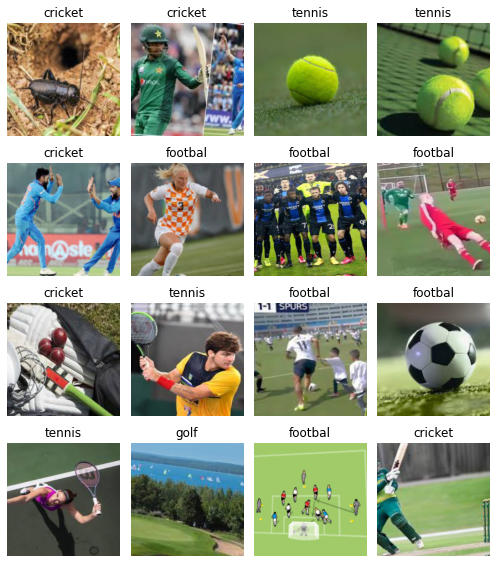

In [67]:
data.show_batch(rows=4, figsize=(7,8))

In [68]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cricket', 'footbal', 'golf', 'tennis'], 4, 1008, 252)

# Training the Model

In [99]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [111]:
learn.fit_one_cycle(4, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.124011,0.251455,0.071429,00:13
1,0.114972,0.430723,0.107143,00:13
2,0.108025,0.213593,0.059524,00:13
3,0.094090,0.194403,0.051587,00:13


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [114]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


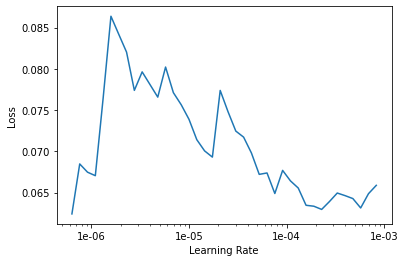

In [115]:
learn.recorder.plot()

In [117]:
learn.fit_one_cycle(1, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.038746,0.211955,0.047619,00:13


In [0]:
learn.save('stage-2')

Interpretation


In [119]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1008 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cricket,cricket,cricket,cricket,cricket
Path: /content/gdrive/My Drive/fastai-v3/data/sports;

Valid: LabelList (252 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cricket,tennis,cricket,golf,footbal
Path: /content/gdrive/My Drive/fastai-v3/data/sports;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        

In [120]:
interp = ClassificationInterpretation.from_learner(learn)

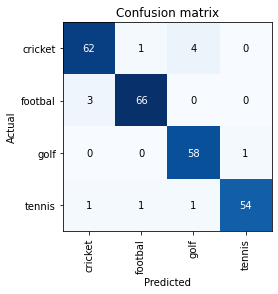

In [121]:
interp.plot_confusion_matrix()

# Cleaning the Data

Cleaning

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [53]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [54]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [55]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [56]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

# Deploying the Model

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

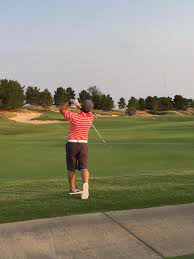

In [127]:
img = open_image(path/'test4.jpeg')
img

In [0]:
learn = load_learner(path)

In [129]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category golf